# Demonstration of SFILES 2.0 <-> flowsheet graph conversion

### Example 1

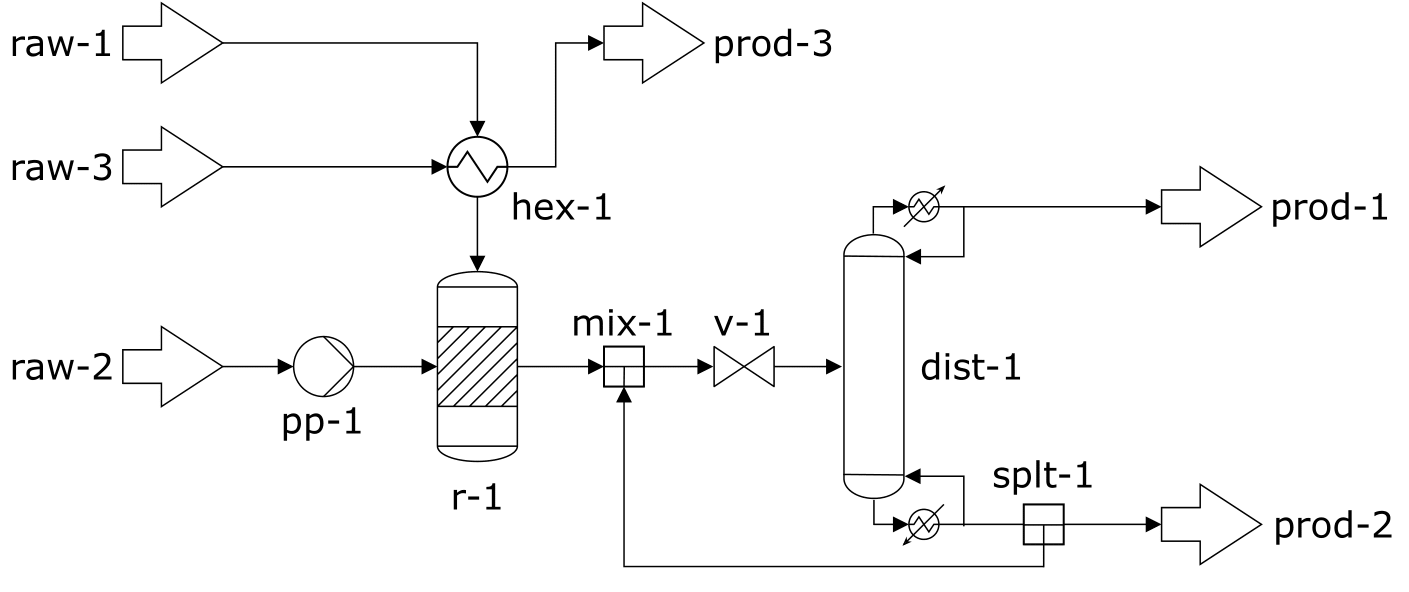

In [3]:
from IPython.display import Image
Image(filename='examples/Flowsheet_theory-1.png') 

How to create graph: 
- add all unit operations as nodes with numbered name (refer to standardized names in paper)
- add all stream connections as edges. ('labels' is optional, 'tags' should be used as described in paper).   
Format:  ('node-1', 'node-2', {'labels': 'streamlabel', 'tags':{'col': [<'tout','tin','bout','bin'>], 'he': [<'x_in','x_out'>]}})

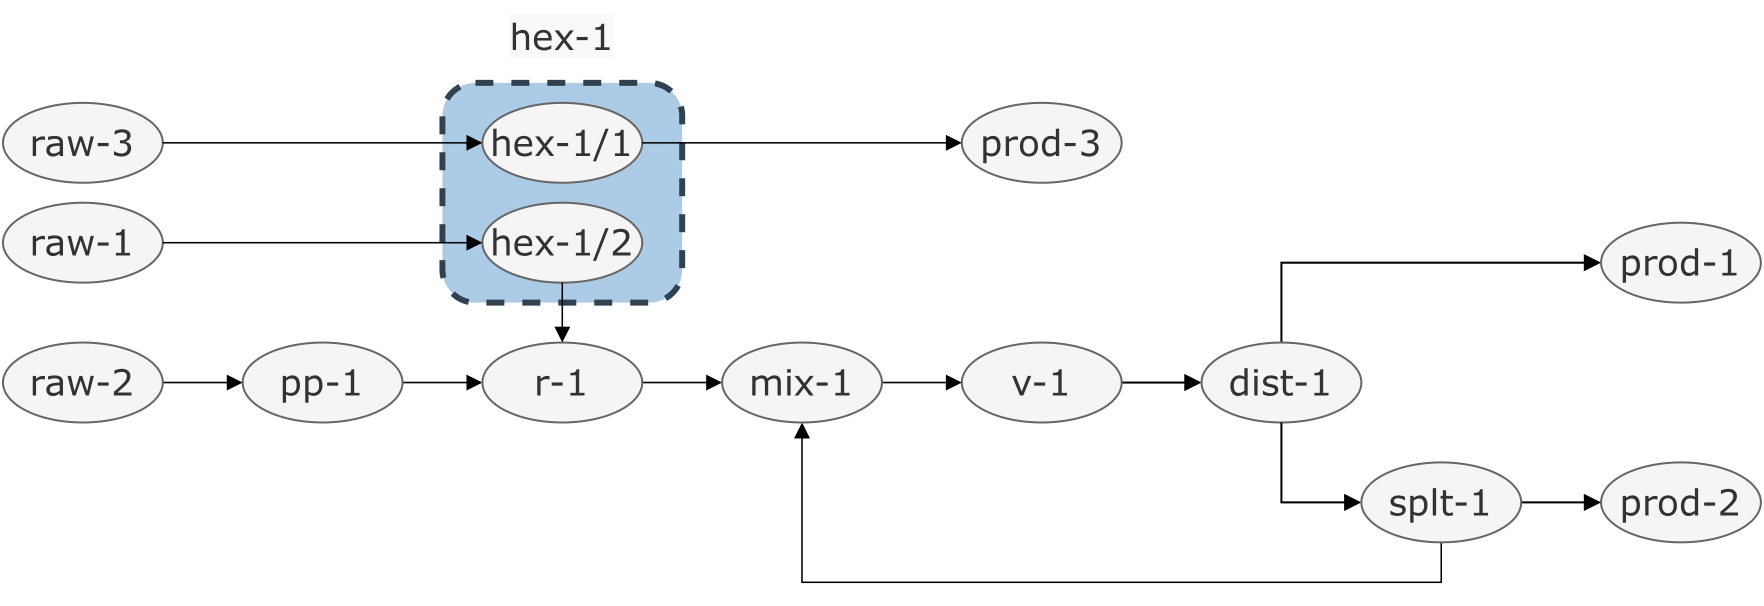

In [4]:
# How the graph should look like in theory
Image(filename='examples/graph_theory-1.png') 

In [5]:
# How to construct graph with code 
import networkx as nx
G = nx.DiGraph()
G.add_nodes_from([
    'raw-1', 'raw-2', 'hex-1', 'pp-1', 'r-1', 'mix-1', 'v-1', 
    'dist-1', 'splt-1', 'prod-1', 'prod-2', 'prod-3', 'raw-3'
    ])
G.add_edges_from([
    ('raw-1', 'hex-1',{'labels': '', 'tags':{'he': ['1_in']}}),
    ('hex-1', 'r-1', {'labels': '', 'tags':{'he': ['1_out']}}), 
    ('raw-2', 'pp-1'), ('pp-1', 'r-1'), ('r-1', 'mix-1'), ('mix-1', 'v-1'), ('v-1', 'dist-1'),
    ('dist-1', 'prod-1', {'tags':{'col': ['tout']}}),
    ('dist-1', 'splt-1', {'tags':{'col': ['bout']}}), 
    ('splt-1','mix-1'), ('splt-1', 'prod-2'), 
    ('raw-3', 'hex-1',{'labels': '', 'tags':{'he': ['2_in']}}), 
    ('hex-1', 'prod-3',{'labels': '', 'tags':{'he': ['2_out']}})
    ])

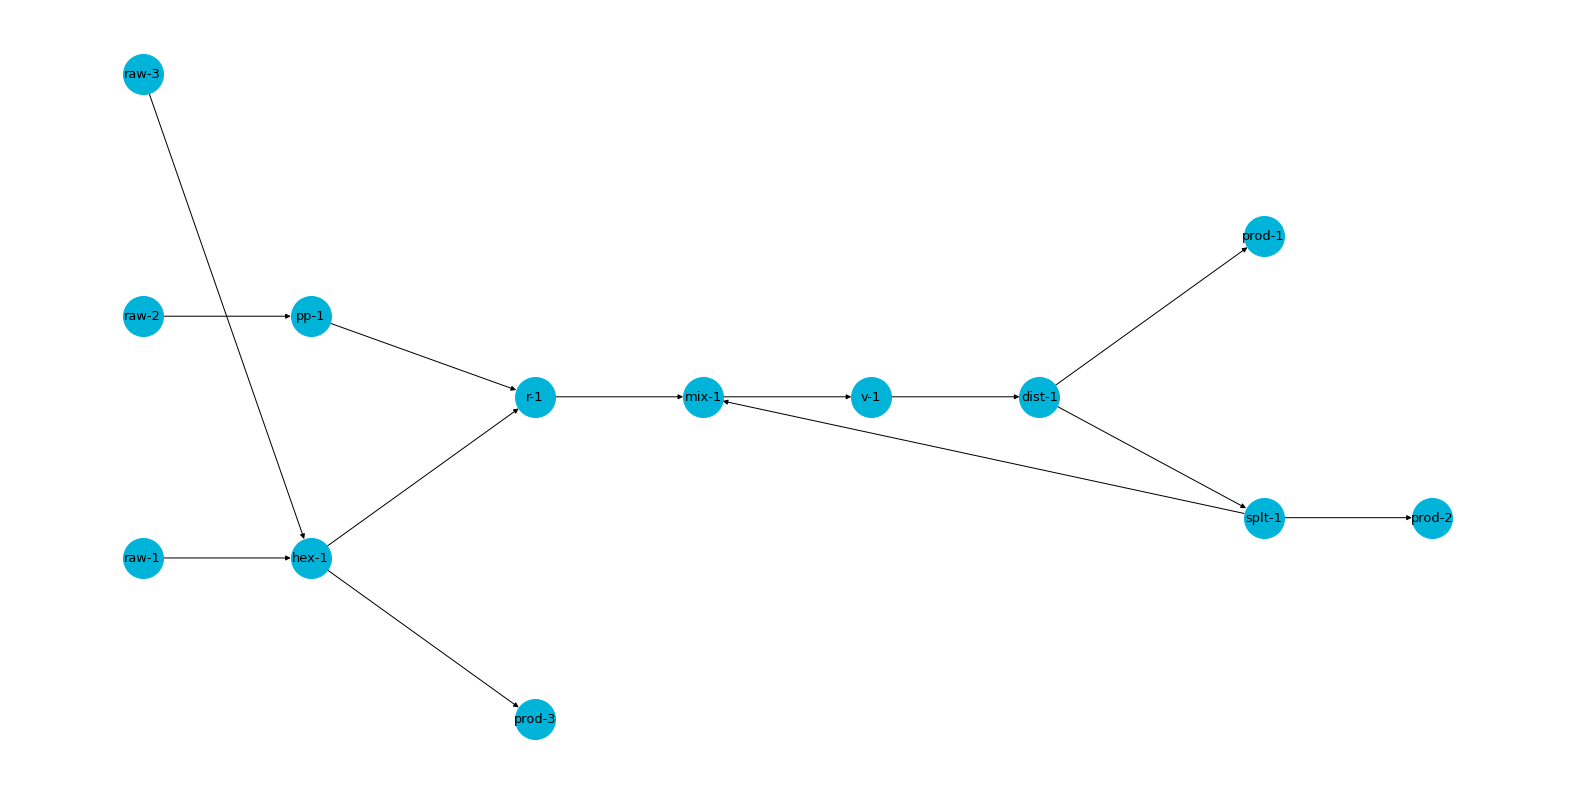

(<Figure size 1560x780 with 1 Axes>, None, None)

In [6]:
# Save graph as flowsheet class object
from Flowsheet_Class.flowsheet import Flowsheet
flowsheet_1=Flowsheet()
flowsheet_1.state=G
flowsheet_1.visualize_flowsheet(table=False, pfd_path='plots/flowsheet1', plot_with_stream_labels=False)


In [7]:
# Create SFILES from graph using the flowsheet class
flowsheet_1.convert_to_sfiles(version='v2')
sfiles_1 = flowsheet_1.sfiles
print(sfiles_1)
flowsheet_1.create_from_sfiles(sfiles_1, override_nx=True)
flowsheet_1.convert_to_sfiles(version='v2')
sfiles_2 = flowsheet_1.sfiles
print(sfiles_1==sfiles_2)

(raw)(hex){1}(r)<&|(raw)(pp)&|(mix)<1(v)(dist)[{tout}(prod)]{bout}(splt)1(prod)n|(raw)(hex){1}(prod)
Overwriting the current self.sfiles_list
True


# Real flowsheet examples (extracted from DWSIM simulation files)

In [48]:
from os import listdir
from os.path import isfile, join
all_files = {i:f for i,f in enumerate(listdir('Real_flowsheets/DWSim_pickle_files')) if isfile(join('Real_flowsheets/DWSim_pickle_files', f))}
all_images = {i:f for i,f in enumerate(listdir('Real_flowsheets/images')) if isfile(join('Real_flowsheets/images', f))}
    

In [49]:
import re
all_sfiles = {}
for i,f in all_files.items():
    # read pickle files and restructure names 
    G = nx.read_gpickle(join('Real_flowsheets/DWSim_pickle_files', f) )
    _node_names = list(G.nodes)
    relabel_mapping = {}
    for n in _node_names:
        r = re.compile("([a-zA-Z]+)([0-9]+)")
        _full_name = r.match(n).groups()
        _name = _full_name[0] # name without number
        _num = _full_name[1]
        relabel_mapping[n] = _name +'-'+ _num
    G = nx.relabel_nodes(G, relabel_mapping)

    # load graph as flowsheet class object
    flowsheet = Flowsheet(OntoCapeConformity=True)
    flowsheet.state = G
    # convert to sfiles (+ -> graph -> sfiles)
    flowsheet.convert_to_sfiles(version='v2', remove_hex_tags=True)
    sfiles_1 = flowsheet.sfiles
    all_sfiles[i]=sfiles_1
    flowsheet.create_from_sfiles(override_nx=True, merge_HI_nodes=False)
    flowsheet.convert_to_sfiles(version='v2', remove_hex_tags=True)
    sfiles_2=flowsheet.sfiles
    print(sfiles_1 == sfiles_2)

Overwriting the current self.sfiles_list
True
Overwriting the current self.sfiles_list
True
Overwriting the current self.sfiles_list
True
Overwriting the current self.sfiles_list
True
Overwriting the current self.sfiles_list
True
Overwriting the current self.sfiles_list
True
Overwriting the current self.sfiles_list
True
Overwriting the current self.sfiles_list
True
Overwriting the current self.sfiles_list
True
Overwriting the current self.sfiles_list
True


## Flowsheet images and SFILES 2.0 from simulation files

Comments:
- Initial node for flowsheet graph traversal (first raw node in SFILES 2.0 string) is marked red in image
- Example NaturalGasProcessing: First flash bottom outlet was zero in simulation file and is not stored as prod node in graph
- Modify i in range [0,9] to look at 10 different examples

WGSR
(raw)(hex)(r)[(prod)](hex)(r)[(prod)](hex)(flash)[{tout}(prod)]{bout}(prod)


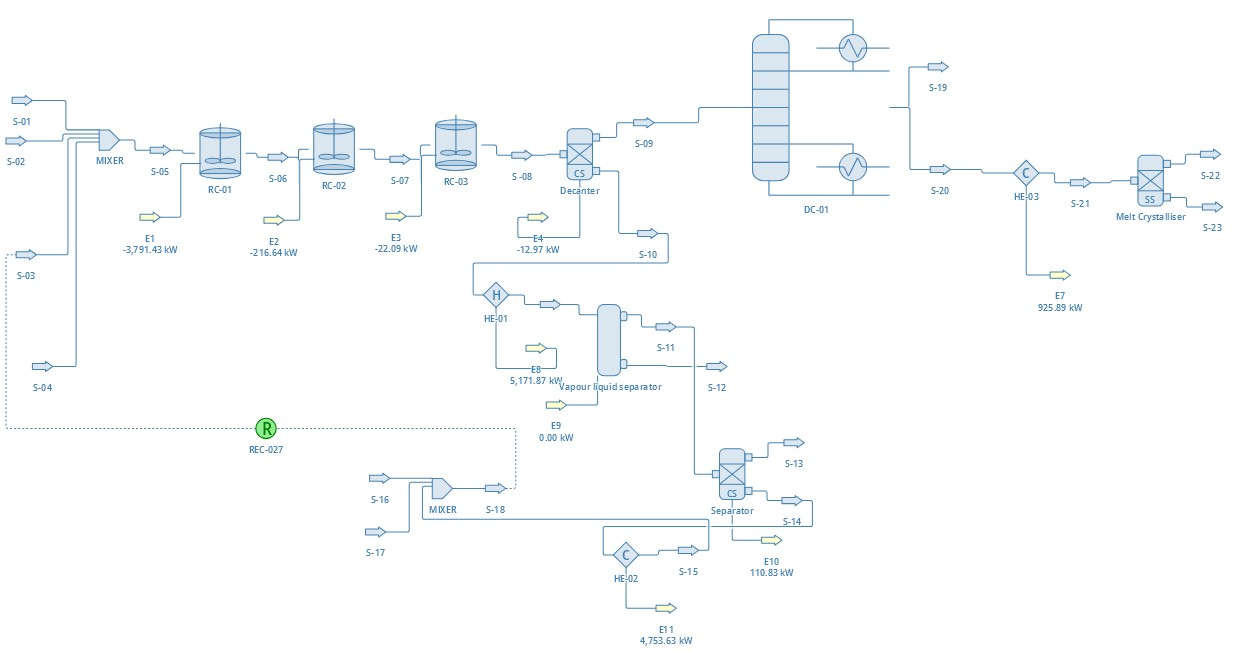

In [63]:
i=4
# Name
print('_'.join(all_files[i].split(sep='_')[2:]).split(sep='.')[0])
# SFILES
print(all_sfiles[i])
# Image
Image(filename=join('Real_flowsheets/images',all_images[i]))